23:37:59 - cmdstanpy - INFO - Chain [1] start processing
23:37:59 - cmdstanpy - INFO - Chain [1] done processing


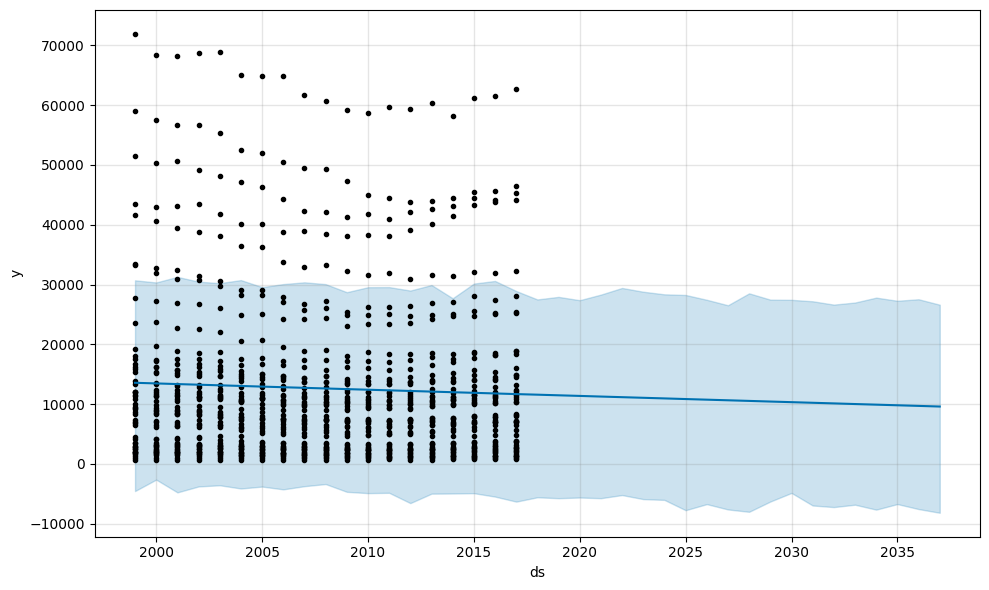

23:37:59 - cmdstanpy - INFO - Chain [1] start processing
23:37:59 - cmdstanpy - INFO - Chain [1] done processing


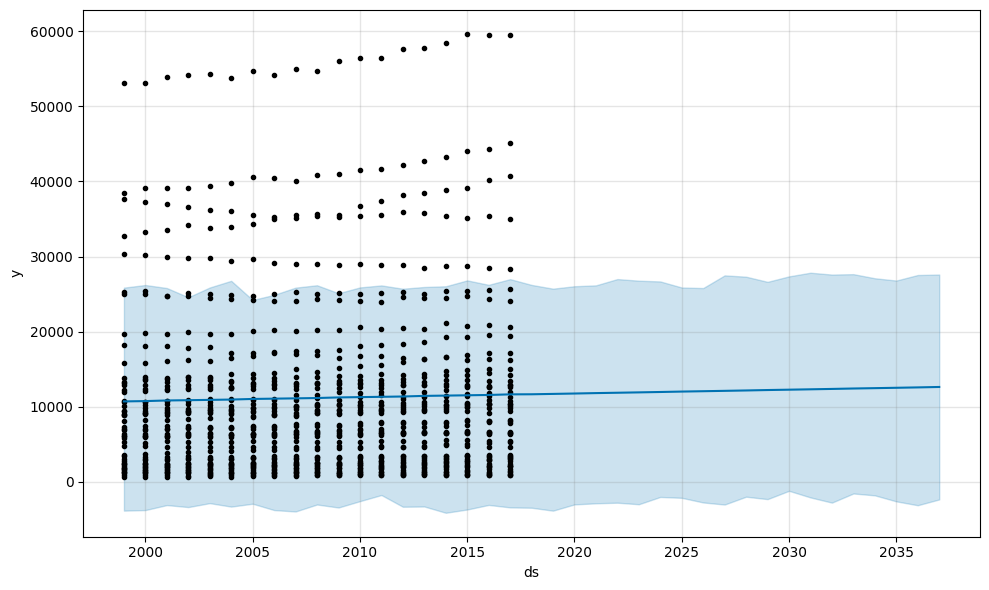

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
# import ace_tools as tools  # For displaying the dataframe

# Load dataset
df = pd.read_csv('../data/processed/US_Deaths_Populations.csv', sep=',')
df_filtered = df[df["State"] != "United States"]

# Predict for Heart disease
df_heart_disease = df_filtered[df_filtered["Cause Name"] == "Heart disease"][["Year", "Deaths"]].rename(columns={"Year": "ds", "Deaths": "y"})
df_heart_disease["ds"] = pd.to_datetime(df_heart_disease["ds"], format="%Y") # format x-axis label

# Train model
model = Prophet()
model.fit(df_heart_disease)

# Predict future years
future = model.make_future_dataframe(periods=20, freq="YE")
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()

# Predict for cancer
df_cancer = df_filtered[df_filtered["Cause Name"] == "Cancer"][["Year", "Deaths"]].rename(columns={"Year": "ds", "Deaths": "y"})
df_cancer["ds"] = pd.to_datetime(df_cancer["ds"], format="%Y") # format x-axis label

# Train model
model = Prophet()
model.fit(df_cancer)

# Predict future years
future = model.make_future_dataframe(periods=20, freq="YE")
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()
